## Prepare datasets

In [ ]:
from dataset import (
    build_FIVES_dataloaders,
    build_hsi_dataloader,
    HSIDataset,
    build_FIVES_random_crops_dataloaders,
    build_hsi_testloader
)
from torch.utils.data import DataLoader, Subset

trainloader_FIVES = (
    build_FIVES_random_crops_dataloaders(
        batch_size=16,
        num_channels=1,
        load_from_path="data/FIVES_random_crops_threshold01",
        # kernel_size=11,
        # sigma=(10, 20),
    )
)[0]

window = (500, 600)
target_augmented = True
trainloader_HSI = build_hsi_dataloader(
    batch_size=1,
    train_split=1,
    val_split=0,
    test_split=0,
    window=window,
    exclude_labeled_data=True,
    augmented=target_augmented,
)[0]

testloader_HSI = build_hsi_testloader(
    window=window,
    batch_size=1
)

print(len(trainloader_HSI.dataset), len(testloader_HSI.dataset))

## Plot Intensity

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from visualize_data import plot_intensity, plot_intensity_for_label


plot_intensity_for_label(trainloader_FIVES, title="Intensity Distribution of background (FIVES)", label=0)
# plot_intensity(trainloader_HSI, title=f'Intensity Distribution of HSI Dataset {window}')
plot_intensity_for_label(testloader_HSI, title=f"Intensity Distribution of bloodvessels in HSI Dataset {window}", label=1)
plot_intensity_for_label(testloader_HSI, title=f"Intensity Distribution of background in HSI Dataset {window}", label=0)


## SNR

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from visualize_data import plot_snr_distribution
    
plot_snr_distribution(trainloader_FIVES, title="SNR Distribution of FIVES Dataset")
plot_snr_distribution(testloader_HSI, title=f"SNR Distribution of HSI Test Dataset {window}")
plot_snr_distribution(trainloader_HSI, title=f"SNR Distribution of HSI Train Dataset {window}")

## Inspect HSI Data

/home/home/tim_ivan/idp/visualize_data.py:58: UserWarning: You passed a edgecolor/edgecolors ([]) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_plot = ax_img.scatter([], [], c=[], s=100, marker="+", edgecolors=[])


Button(description='Clear Selections', style=ButtonStyle())

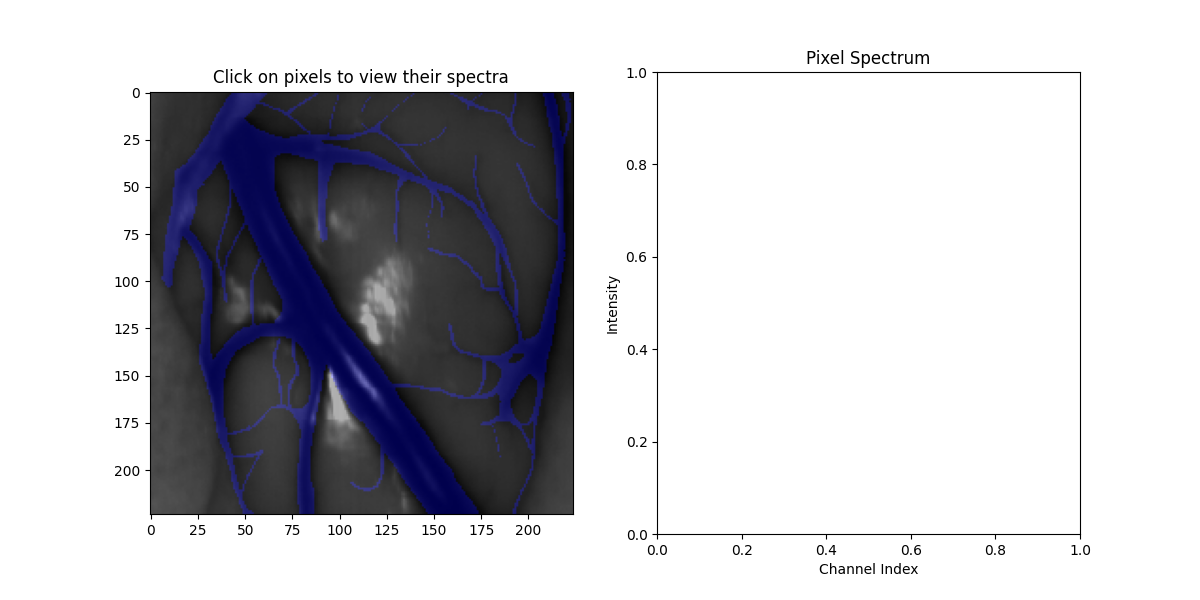

In [1]:
from visualize_data import show_interactive_image_with_spectrum

%matplotlib widget
show_interactive_image_with_spectrum(image_id=4, rgb=False)